In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('drug2.csv')
dose_sex = []
for i in range(len(df)):
    dose_sex.append(df.dose[i]*df.response[i])
df['Dose_Sex']=dose_sex    
print(df.head())
x = df[['sex','dose','Dose_Sex']]
y = df['response']


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.6)


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics

print("\nRoot Mean Square Error : ",np.sqrt(mean_squared_error(y_test, predictions.tolist())))
print('\n')
print(model.summary())




   sex  dose  response  Dose_Sex
0    1   0.1     13.75     1.375
1    1   0.2     12.90     2.580
2    1   0.3     19.26     5.778
3    1   0.4     20.34     8.136
4    1   0.5     19.97     9.985

Root Mean Square Error :  12.969835452932834


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.355e+04
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:37:11   Log-Likelihood:                -5109.3
No. Observations:                1280   AIC:                         1.022e+04
Df Residuals:                    1277   BIC:                         1.024e+04
Df Model:                           3                                         
Covariance Type:            nonrobust      

In [3]:
d = {'Real Value':y_test,'Predicted Value':predictions.tolist(),'Error':np.subtract(y_test,predictions.tolist())}
Pred = pd.DataFrame(data=d)
print(Pred.head(20))


      Real Value  Predicted Value      Error
2419       62.89        70.678404  -7.788404
1826       83.59        80.315649   3.274351
4          19.97        58.233722 -38.263722
1283      234.59       236.535163  -1.945163
1663      184.01       166.639645  17.370355
58        169.94       151.102946  18.837054
1308        8.51         2.306171   6.203829
781        24.34        31.848133  -7.508133
3069      201.60       187.246693  14.353307
1350       23.10        19.280051   3.819949
1313        9.22         3.670357   5.549643
2957       20.45        20.643227  -0.193227
590        33.54        42.332703  -8.792703
1075      211.01       204.426006   6.583994
2355       22.33        20.810281   1.519719
1492      260.97       276.308180 -15.338180
1933       14.06        10.287490   3.772510
3053      156.83       137.173592  19.656408
2400       14.73        56.782336 -42.052336
3164       24.22        25.180356  -0.960356


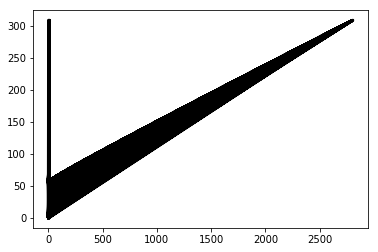

In [4]:
plt.plot(X_test,predictions.tolist(), color='black', linewidth=3)


(array([245., 234., 300., 207., 119., 136., 113.,  53., 101.,  87., 140.,
         44.,  14.,  20.,  11.,  18.,  11.,  10.,   9.,   1.,   7.,  21.,
          4.,   4.,   6.,   5.]),
 array([2.19098652e-02, 1.80386393e+00, 3.58581800e+00, 5.36777207e+00,
        7.14972614e+00, 8.93168021e+00, 1.07136343e+01, 1.24955884e+01,
        1.42775424e+01, 1.60594965e+01, 1.78414506e+01, 1.96234046e+01,
        2.14053587e+01, 2.31873128e+01, 2.49692668e+01, 2.67512209e+01,
        2.85331750e+01, 3.03151290e+01, 3.20970831e+01, 3.38790372e+01,
        3.56609913e+01, 3.74429453e+01, 3.92248994e+01, 4.10068535e+01,
        4.27888075e+01, 4.45707616e+01, 4.63527157e+01]),
 <a list of 26 Patch objects>)

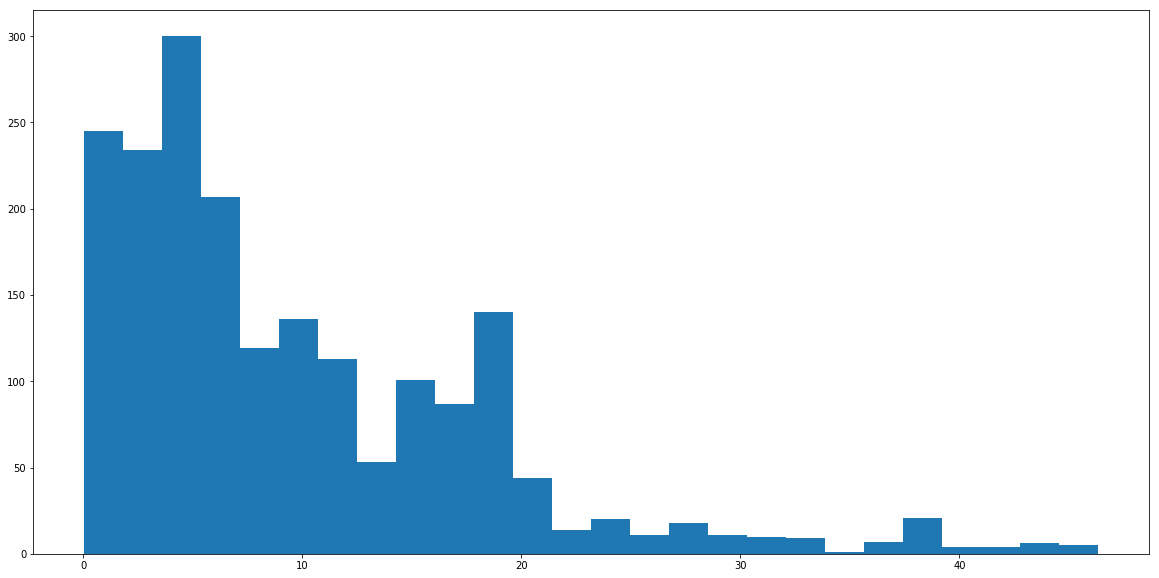

In [5]:
#Gaussian Plot to check error distribution
error = Pred.Error.tolist()
error = [abs(error[i]) for i in range(len(Pred))]
plt.figure(figsize=(20,10))
plt.hist(error,bins='auto')